In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time
from glob import glob
from IPython.display import Image
import tensorflow as tf
#from tensorflow.keras import models, layers, datasets
import datetime, uuid

In [3]:
#import torch
#torch.cuda.empty_cache()

In [4]:
print(torch.__version__)

1.13.1


In [5]:
from platform import python_version
print(python_version())

3.9.12


In [6]:
!pip install tensorflow
!pip install tensorboard

In [7]:
#!git clone https://github.com/ultralytics/yolov5


In [8]:
%cd yolov5

C:\Users\Dell\Documents\AMIELIA FYP\TEST\yolov5


In [9]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install --upgrade Pillow
!pip install cudnn

ERROR: Could not find a version that satisfies the requirement cudnn (from versions: none)
ERROR: No matching distribution found for cudnn


In [12]:
#Training
#!python train.py --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2 --img 416 --cache --hyp hyp.scratch-high.yaml

In [13]:
#Validation
#!pip install pycocotools
#!python val.py --batch 16 --data dataset.yml  --img 416 --weights runs/train/exp15/weights/best.pt --augment



In [14]:
%load_ext tensorboard
%tensorboard --logdir runs


Reusing TensorBoard on port 6006 (pid 16540), started 0:05:28 ago. (Use '!kill 16540' to kill it.)

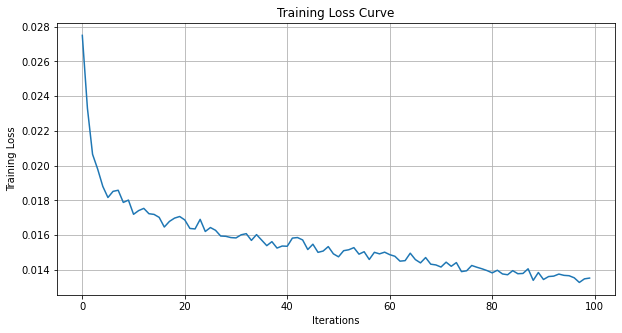

In [15]:
import csv
import matplotlib.pyplot as plt

# Path to the training results file (e.g., 'results.csv')
results_file_path = 'C:/Users/Dell/Documents/AMIELIA FYP/TEST/yolov5/runs/train/exp15/results.csv'

# Read the training results file
train_losses = []
with open(results_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row if it exists
    for row in csv_reader:
        train_loss = float(row[2])
        train_losses.append(train_loss)

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()



In [16]:
%pip install ultralytics
%pip install --upgrade ultralytics


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Dell/Documents/AMIELIA FYP/TEST/yolov5/runs/train/exp15/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Dell/.cache\torch\hub\master.zip
YOLOv5  2024-1-9 Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [18]:
#image testing for detection (2)
from IPython.display import Image
from PIL import Image

# Images
im1 = Image.open('runs/testmap/Image_2745.jpeg')
im2 = Image.open('runs/testmap/Image_2746.jpeg')
im3 = Image.open('runs/testmap/Image_2747.jpeg')
im4 = Image.open('runs/testmap/Image_2748.jpeg')

# Inference
results = model([im1,im2,im3,im4]) # batch of images

# Results
results.print()  
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)



image 1/4: 4032x3024 1 no hi-vis vest
image 2/4: 262x192 1 hi-vis vest, 1 no hard hat
image 3/4: 540x347 1 hard hat
image 4/4: 346x450 1 hard hat, 1 no hi-vis vest
Speed: 20.7ms pre-process, 12.0ms inference, 73.8ms NMS per image at shape (4, 3, 640, 640)
Saved 4 images to runs\detect\exp16


,xmin,ymin,xmax,ymax,confidence,class,name
0,716.135498,2394.398926,2234.952148,4032.0,0.806722,3,no hi-vis vest


In [19]:
results.xyxy[1]  # im1 predictions (tensor)
results.pandas().xyxy[1]  # im1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,29.385088,72.592087,157.947250,257.353027,0.750988,1,hi-vis vest
1,62.079838,0.854224,117.583763,30.514893,0.692909,2,no hard hat


In [20]:
results.xyxy[2]  # im1 predictions (tensor)
results.pandas().xyxy[2]  # im1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,175.169632,34.044525,240.407471,82.176476,0.906932,0,hard hat


In [21]:
results.xyxy[3]  # im1 predictions (tensor)
results.pandas().xyxy[3]  # im1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,311.197174,70.444054,374.833038,113.204559,0.900897,0,hard hat
1,293.432617,136.794113,381.664490,279.052338,0.729182,3,no hi-vis vest


In [22]:
#test image dataset for mAP
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [23]:
#image testing for detection (2)
!python detect.py --data dataset.yml --source runs/testmap/Image_2748.jpeg --weights runs/train/exp15/weights/best.pt --conf 0.65 --iou 0.5 --save-txt --save-conf
#Image(filename='runs/detect/exp2/Image_2748.jpeg', width=416)

detect: weights=['runs/train/exp15/weights/best.pt'], source=runs/testmap/Image_2748.jpeg, data=dataset.yml, imgsz=[640, 640], conf_thres=0.65, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Dell\Documents\AMIELIA': No such file or directory
YOLOv5  2023-4-5 Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\Dell\Documents\AMIELIA FYP\TEST\yolov5\runs\testmap\Image_2748.jpeg: 512x640 1 hard hat, 1 no hi-vis vest, 17.7ms
Speed: 1.0ms pre-process, 17.7ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detec

In [24]:
from IPython.display import Image

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()